# Decision Tree Classifier

In [39]:
# Need to install
#pip install graphviz
#pip install pydotplus
#pip install decision-tree-id3

In [40]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import other dependencies
import six
from sklearn import tree #For our Decision Tree
from sklearn import metrics #For our Decision Tree
from sklearn.model_selection import train_test_split

import pydotplus # To create our Decision Tree Graph
from sklearn.tree import export_text # To visualize the Tree in a text organized way
from IPython.display import Image  # To Display an image of our graph
import graphviz #To display an imahe of the tree


In [41]:
# Read dataset
golf = pd.read_excel('golf_dataset.xlsx')

golf.head(5)
#golf.Outlook.unique()

,Day,Outlook,Temperature,Humidity,Windy,Play
0,D1,Sunny,Hot,High,False,no
1,D2,Sunny,Hot,High,True,no
2,D3,Overcast,Hot,Normal,False,yes
3,D4,Rain,Mild,High,False,yes
4,D5,Rain,Cool,Normal,False,yes


In [48]:
# Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
golf['Outlook'],_ = pd.factorize(golf['Outlook'])
golf['Temperature'],_ = pd.factorize(golf['Temperature'])
golf['Humidity'],_ = pd.factorize(golf['Humidity'])
golf['Windy'],_ = pd.factorize(golf['Windy'])

#print the new dummy data
cat_data = golf.loc[:,('Outlook','Temperature','Humidity','Windy')]
cat_data

,Outlook,Temperature,Humidity,Windy
0,0,0,0,0
1,0,0,0,1
2,1,0,1,0
3,2,1,0,0
4,2,2,1,0
5,2,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,2,1,1,0


In [43]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier(criterion='entropy')

#clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
#clf = tree.DecisionTreeClassifier()

# Training the Decision Tree - Can split the data here for training
x_train, x_test, y_train, y_test = train_test_split(cat_data, golf['Play'], test_size=0.1, random_state=4)

#config = {'algorithm': 'ID3'}
clf_train = clf.fit(x_train, y_train)

# Model Accuracy, how often is the classifier correct?
#Predict testing set
#y_pred = clf.predict(x_test)
#print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))



digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]"] ;
1 [label="X[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
1 -> 3 ;
4 [label="X[0] <= 1.5\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="entropy = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
4 -> 5 ;
6 [label="X[3] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]"] ;
4 -> 6 ;
7 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
6 -> 7 ;
8 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
6 -> 8 ;
}


In [44]:
# Another tree visualization
r = export_text(clf_train, feature_names=list(cat_data.columns.values))
print(r)

|--- Humidity <= 0.50
|   |--- Outlook <= 0.50
|   |   |--- class: no
|   |--- Outlook >  0.50
|   |   |--- class: yes
|--- Humidity >  0.50
|   |--- Outlook <= 1.50
|   |   |--- class: yes
|   |--- Outlook >  1.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: yes
|   |   |--- Windy >  0.50
|   |   |   |--- class: no



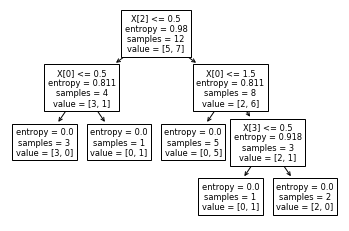

In [45]:
# Another tree visualization
tree.plot_tree(clf) 
plt.show()

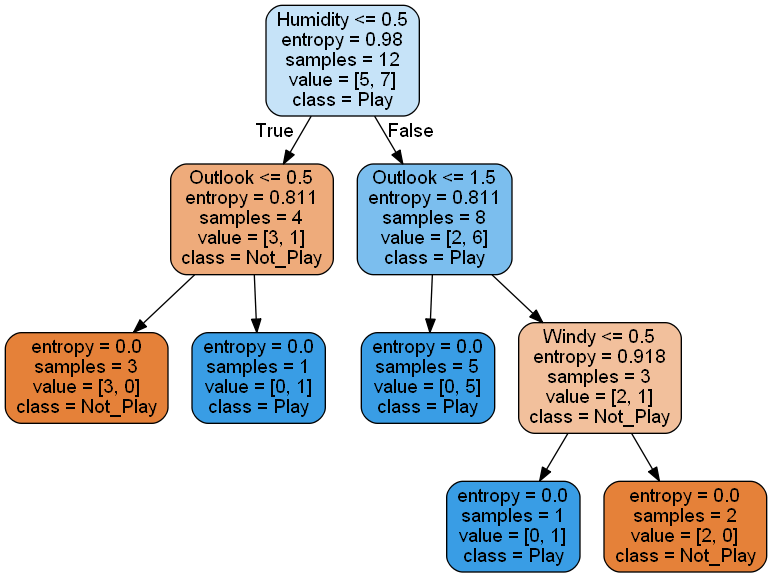

In [46]:
# Another tree visualization

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(cat_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True)


#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [47]:
# Making a Prediction On a New Sample
#sample_one_pred = clf.predict([[0, 1, 1, 0]])
sample_one_pred = clf.predict([[2, 0, 0, 1]])
print(sample_one_pred)

['yes']
